# Head

In [1]:
import pandas as pd
from pathlib import Path
home = Path.home()

models = ['deepseek_v3', 'gemma3', 'llama4', 'qwq', 'qwen3']
# models = ['deepseek_v3', 'gemma3', 'llama4']

suffixes = None
# suffixes = '_sent_shuffle'
# suffixes = '_tail'
if suffixes is not None:
    csv_files = [home / f'projects/TLDR/data/paper_html_10.1038/abs_annotation/generated_annotations/{model}_TLDR{suffixes}.txt' for model in models]
else:
    csv_files = [home / f'projects/TLDR/data/paper_html_10.1038/abs_annotation/generated_annotations/{model}_TLDR.txt' for model in models]

df = pd.read_csv(home / 'projects/TLDR/data/paper_html_10.1038/abs_annotation/test.tsv', sep='\t')
for model, csv_file in zip(models, csv_files):
    single_df = pd.read_csv(csv_file, sep='\t', header=None, names=[model])
    df = df.join(single_df)

for index in pd.read_csv(home / "projects/TLDR/description/invalid_entry_in_test.txt", sep='\t', header=None).values.flatten().tolist():
    df = df.drop(index-2)  # Adjusting for zero-based index
df

,abs_doi,paper_id,abstract,annotation,deepseek_v3,gemma3,llama4,qwq,qwen3
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study provides genetic evidence for two i...,Reference 16 provides a molecular phylogeny of...,This study proposes that zebu and taurine catt...,This study uses mitochondrial DNA analysis to ...,This study analyzes mitochondrial DNA diversit...
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides genetic evidence for indep...,This study demonstrates independent domesticat...,This study reports the origin of European and ...,This study uses mitochondrial and nuclear DNA ...,This study demonstrates independent domesticat...
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study reports the fine-mapping of a QTL f...,Reference 53 reports fine-mapping of a QTL for...,The QTL was fine-mapped to a 5 cM region on BT...,This study uses high-density marker genotyping...,This study fine-maps a milk production QTL on ...
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study provides the first genome-wide LD m...,This study documents an unusually strong and l...,The authors provide evidence that linkage dise...,This study generates a genome-wide linkage dis...,This study reports high levels of both synteni...
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on chromosom...,This study identifies a major QTL on pig chrom...,This study reports a major QTL on SSC4 for fat...,This study identifies a major quantitative tra...,This study identifies quantitative trait loci ...
...,...,...,...,...,...,...,...,...,...
35631,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study demonstrates that CD4+CD127lo/−CD25...,This study provides a method for isolation and...,This study demonstrates that Tregs can be expa...,This study evaluates methods for isolating and...,This study demonstrates that CD4+CD127lo/−CD25...
35632,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study reports the engineering of orthogon...,This study describes an engineered IL-2/IL-2R ...,This study presents an engineered IL-2 partial...,This study engineers synthetic IL-2–receptor p...,This study describes engineered orthogonal IL-...
35633,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies hybrid insulin peptides ...,This study reports the identification of hybri...,This study highlights the potential importance...,This study identifies hybrid peptides—covalent...,This study identifies hybrid peptides formed b...
35634,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This study demonstrates a multiplex genome-edi...,This work reports on a cell engineering strate...,This study identifies a strategy for broad imm...,This study describes a dual strategy to engine...,This work describes a multiplex genome editing...


In [20]:
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


# Load publication venue and year from MAG

In [21]:
import pickle
print("Loading doi_mag_pid_dict...")
with open(home / "projects/TLDR/data/doi_mag_pid_dict.pkl", "rb") as f:
    doi_mag_pid_dict = pickle.load(f)
    print("doi_mag_pid_dict loaded.")

df['mag_pid'] = df['abs_doi'].map(doi_mag_pid_dict)
df = df.dropna(subset=['mag_pid'])
df.loc[:, 'mag_pid'] = df['mag_pid'].parallel_apply(lambda x: x.split(';')[0] if isinstance(x, str) else x)
df.loc[:, 'mag_pid'] = df['mag_pid'].astype(int)
display(df)

Loading doi_mag_pid_dict...
doi_mag_pid_dict loaded.


,abs_doi,paper_id,abstract,annotation,deepseek_v3,qwen3,gemma3,llama4,qwq,mag_pid,title
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study provides genetic evidence for two i...,This study analyzes mitochondrial DNA diversit...,Reference 16 provides a molecular phylogeny of...,This study proposes that zebu and taurine catt...,This study uses mitochondrial DNA analysis to ...,2005395185,Evidence for two independent domestications of...
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides genetic evidence for indep...,This study demonstrates independent domesticat...,This study demonstrates independent domesticat...,This study reports the origin of European and ...,This study uses mitochondrial and nuclear DNA ...,2110049233,The Origin of the Domestic Pig: Independent Do...
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study reports the fine-mapping of a QTL f...,This study fine-maps a milk production QTL on ...,Reference 53 reports fine-mapping of a QTL for...,The QTL was fine-mapped to a 5 cM region on BT...,This study uses high-density marker genotyping...,2082900742,Fine-mapping of quantitative trait loci by ide...
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study provides the first genome-wide LD m...,This study reports high levels of both synteni...,This study documents an unusually strong and l...,The authors provide evidence that linkage dise...,This study generates a genome-wide linkage dis...,2103106090,Extensive Genome-wide Linkage Disequilibrium i...
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on chromosom...,This study identifies quantitative trait loci ...,This study identifies a major QTL on pig chrom...,This study reports a major QTL on SSC4 for fat...,This study identifies a major quantitative tra...,2045457895,Genetic mapping of quantitative trait loci for...
...,...,...,...,...,...,...,...,...,...,...,...
34770,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study demonstrates that CD4+CD127lo/−CD25...,This study demonstrates that CD4+CD127lo/−CD25...,This study provides a method for isolation and...,This study demonstrates that Tregs can be expa...,This study evaluates methods for isolating and...,2137227986,Expansion of Human Regulatory T-Cells From Pat...
34771,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study reports the engineering of orthogon...,This study describes engineered orthogonal IL-...,This study describes an engineered IL-2/IL-2R ...,This study presents an engineered IL-2 partial...,This study engineers synthetic IL-2–receptor p...,2789780246,Selective targeting of engineered T cells usin...
34772,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies hybrid insulin peptides ...,This study identifies hybrid peptides formed b...,This study reports the identification of hybri...,This study highlights the potential importance...,This study identifies hybrid peptides—covalent...,2266478788,Pathogenic CD4 T cells in type 1 diabetes reco...
34773,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This study demonstrates a multiplex genome-edi...,This work describes a multiplex genome editing...,This work reports on a cell engineering strate...,T

In [ ]:
MAG_paper_df = pd.read_parquet('/home/lyuzhuoqi/projects/TLDR/data/MAG_paper.parquet')
df = df.merge(MAG_paper_df[['VenueID', 'Year']], left_on='mag_pid', right_index=True, how='inner')
df.rename(columns={'VenueID': 'mag_vid', 'Year': 'year'}, inplace=True)
display(df)

,Year,DocType,VenueID
PaperID,,,
3206416479,1800,Journal,2360835
3205676634,1800,Journal,148921865
3092044961,1800,Journal,3006142753
3092547797,1800,Journal,3006142753
2895498877,1800,Journal,118082279
...,...,...,...
3212273925,2022,Journal,44455300
3175031963,2022,Journal,2764413287
3198241111,2022,Journal,67716761


,abs_doi,paper_id,abstract,annotation,deepseek_v3,qwen3,gemma3,llama4,qwq,mag_pid,title,mag_vid,year
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study provides genetic evidence for two i...,This study analyzes mitochondrial DNA diversit...,Reference 16 provides a molecular phylogeny of...,This study proposes that zebu and taurine catt...,This study uses mitochondrial DNA analysis to ...,2005395185,Evidence for two independent domestications of...,125754415,1994
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides genetic evidence for indep...,This study demonstrates independent domesticat...,This study demonstrates independent domesticat...,This study reports the origin of European and ...,This study uses mitochondrial and nuclear DNA ...,2110049233,The Origin of the Domestic Pig: Independent Do...,65932378,2000
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study reports the fine-mapping of a QTL f...,This study fine-maps a milk production QTL on ...,Reference 53 reports fine-mapping of a QTL for...,The QTL was fine-mapped to a 5 cM region on BT...,This study uses high-density marker genotyping...,2082900742,Fine-mapping of quantitative trait loci by ide...,125754415,1999
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study provides the first genome-wide LD m...,This study reports high levels of both synteni...,This study documents an unusually strong and l...,The authors provide evidence that linkage dise...,This study generates a genome-wide linkage dis...,2103106090,Extensive Genome-wide Linkage Disequilibrium i...,43092948,2000
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on chromosom...,This study identifies quantitative trait loci ...,This study identifies a major QTL on pig chrom...,This study reports a major QTL on SSC4 for fat...,This study identifies a major quantitative tra...,2045457895,Genetic mapping of quantitative trait loci for...,3880285,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34770,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study demonstrates that CD4+CD127lo/−CD25...,This study demonstrates that CD4+CD127lo/−CD25...,This study provides a method for isolation and...,This study demonstrates that Tregs can be expa...,This study evaluates methods for isolating and...,2137227986,Expansion of Human Regulatory T-Cells From Pat...,129060628,2009
34771,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study reports the engineering of orthogon...,This study describes engineered orthogonal IL-...,This study describes an engineered IL-2/IL-2R ...,This study presents an engineered IL-2 partial...,This study engineers synthetic IL-2–receptor p...,2789780246,Selective targeting of engineered T cells usin...,3880285,2018
34772,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies hybrid insulin peptides ...,This study identifies hybrid peptides formed b...,This study reports the identification of hybri...,This study highlights the potential importance...,This study identifies hybrid peptides—covalent...,2266478788,Pathogenic CD4 T cells in type 1 diabetes reco...,3880285,2016
34773,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This study demonst

# Load subject label

In [23]:
label_df = pd.read_parquet(home / 'projects/TLDR/data/cluster_df.parquet')
label_df

,Scopus_label,movMF_label,movMF_distance,x_val,y_val,kmeans_label,kmeans_distance,skm_label,skm_distance,spectral_label,n2v_kmeans_label,cm_kmeans_label,gnn_kmeans_label,bert_kmeans_label
202381698,Multidisciplinary,22,0.445886,-67.928200,15.572327,17,0.628846,20,0.444711,24,3,21,0,0
137773608,Multidisciplinary,22,0.590942,-68.405334,-55.633186,17,0.735654,20,0.559494,24,20,21,0,3
125754415,Multidisciplinary,22,0.574571,-68.448853,-55.613579,17,0.705024,20,0.550081,24,20,21,0,0
3880285,Multidisciplinary,23,0.618842,-68.407288,-55.634430,8,0.724859,17,0.610582,24,20,21,0,3
111155417,Chemistry,23,0.220853,-54.506985,-61.217068,11,0.495787,12,0.198758,14,4,24,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764485818,Medicine,21,0.268070,-28.969574,34.819569,18,0.542531,14,0.251015,8,18,1,19,1
83454320,Arts and Humanities,25,0.034777,78.609909,31.736822,13,0.251599,3,0.056642,21,5,1,14,1
16507453,Arts and Humanities,6,0.113656,89.206772,17.625090,13,0.307089,3,0.128660,21,5,1,14,1
121509672,Agricultural and Biological Sciences,5,0.179111,-36.757057,-0.591017,21,0.430040,16,0.207435,10,5,1,10,1


In [24]:
df = df.merge(label_df[['kmeans_label', 'Scopus_label']], left_on='mag_vid', right_index=True, how='inner')
df.rename(columns={'kmeans_label': 'p2v_label', 'Scopus_label': 'scopus_label'}, inplace=True)
df

,abs_doi,paper_id,abstract,annotation,deepseek_v3,qwen3,gemma3,llama4,qwq,mag_pid,title,mag_vid,year,p2v_label,scopus_label
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study provides genetic evidence for two i...,This study analyzes mitochondrial DNA diversit...,Reference 16 provides a molecular phylogeny of...,This study proposes that zebu and taurine catt...,This study uses mitochondrial DNA analysis to ...,2005395185,Evidence for two independent domestications of...,125754415,1994,17,Multidisciplinary
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides genetic evidence for indep...,This study demonstrates independent domesticat...,This study demonstrates independent domesticat...,This study reports the origin of European and ...,This study uses mitochondrial and nuclear DNA ...,2110049233,The Origin of the Domestic Pig: Independent Do...,65932378,2000,17,"Biochemistry, Genetics and Molecular Biology"
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study reports the fine-mapping of a QTL f...,This study fine-maps a milk production QTL on ...,Reference 53 reports fine-mapping of a QTL for...,The QTL was fine-mapped to a 5 cM region on BT...,This study uses high-density marker genotyping...,2082900742,Fine-mapping of quantitative trait loci by ide...,125754415,1999,17,Multidisciplinary
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study provides the first genome-wide LD m...,This study reports high levels of both synteni...,This study documents an unusually strong and l...,The authors provide evidence that linkage dise...,This study generates a genome-wide linkage dis...,2103106090,Extensive Genome-wide Linkage Disequilibrium i...,43092948,2000,17,"Biochemistry, Genetics and Molecular Biology"
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on chromosom...,This study identifies quantitative trait loci ...,This study identifies a major QTL on pig chrom...,This study reports a major QTL on SSC4 for fat...,This study identifies a major quantitative tra...,2045457895,Genetic mapping of quantitative trait loci for...,3880285,1994,8,Multidisciplinary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34770,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study demonstrates that CD4+CD127lo/−CD25...,This study demonstrates that CD4+CD127lo/−CD25...,This study provides a method for isolation and...,This study demonstrates that Tregs can be expa...,This study evaluates methods for isolating and...,2137227986,Expansion of Human Regulatory T-Cells From Pat...,129060628,2009,17,Medicine
34771,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study reports the engineering of orthogon...,This study describes engineered orthogonal IL-...,This study describes an engineered IL-2/IL-2R ...,This study presents an engineered IL-2 partial...,This study engineers synthetic IL-2–receptor p...,2789780246,Selective targeting of engineered T cells usin...,3880285,2018,8,Multidisciplinary
34772,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies hybrid insulin peptides ...,This study identifies hybrid peptides formed b...,This study reports the identification of hybri...,This study highlights the potential importance...,This study identifies hybrid peptides—covalent...,226647

In [7]:
df['p2v_label'].value_counts()

p2v_label
17    18439
8      9625
6      1457
7      1028
4       627
9       611
11      580
22      404
18      363
21      319
12      292
20      121
1        60
3        49
14       32
5        25
24       21
16       21
15       17
23       16
2        16
0        10
19        6
13        5
25        2
Name: count, dtype: int64

In [8]:
df['scopus_label'].value_counts()

scopus_label
Multidisciplinary                               15639
Medicine                                         5262
Immunology and Microbiology                      4146
Biochemistry, Genetics and Molecular Biology     4116
Chemistry                                        1285
Neuroscience                                     1211
Agricultural and Biological Sciences              704
Social Sciences                                   608
Earth and Planetary Sciences                      235
Materials Science                                 179
Psychology                                        156
Physics and Astronomy                             139
Pharmacology, Toxicology and Pharmaceutics        128
Environmental Science                             119
Energy                                             39
Mathematics                                        30
Engineering                                        28
Computer Science                                   24
Nursing        

# Predict subject

## 10-fold cv

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate, StratifiedKFold
from tqdm import tqdm

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

text_features = ['abstract', 'annotation', 'deepseek_v3', 'qwen3','gemma3', 'llama4', 'qwq']
y = (df['p2v_label'] == 17).astype(int)  # 17为1，否则为0

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1']

results = []
for feat in text_features:
    print(f"Processing feature: {feat}")
    X_text = df[feat].astype(str).fillna('')
    vectorizer = ProgressHashingVectorizer(n_features=2**18, stop_words='english', alternate_sign=False)
    X = vectorizer.transform(X_text)
    clf = MultinomialNB()
    scores = cross_validate(clf, X, y, cv=cv, scoring=scoring, n_jobs=-1, verbose=1)
    res = {
        'feature': feat,
        'accuracy_mean': scores['test_accuracy'].mean(),
        'accuracy_std': scores['test_accuracy'].std(),
        'precision_mean': scores['test_precision'].mean(),
        'precision_std': scores['test_precision'].std(),
        'recall_mean': scores['test_recall'].mean(),
        'recall_std': scores['test_recall'].std(),
        'f1_mean': scores['test_f1'].mean(),
        'f1_std': scores['test_f1'].std(),
    }
    print(
        f"Feature: {feat} | "
        f"Acc: {res['accuracy_mean']:.4f}±{res['accuracy_std']:.4f} | "
        f"Precision: {res['precision_mean']:.4f}±{res['precision_std']:.4f} | "
        f"Recall: {res['recall_mean']:.4f}±{res['recall_std']:.4f} | "
        f"F1: {res['f1_mean']:.4f}±{res['f1_std']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
results_df

Processing feature: abstract


Vectorizing documents: 100%|████████████████████████████████████████████| 34146/34146 [00:01<00:00, 22929.86it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    4.5s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.6s finished


Feature: abstract | Acc: 0.6962±0.0039 | Precision: 0.6544±0.0022 | Recall: 0.9270±0.0074 | F1: 0.7672±0.0035
Processing feature: annotation


Vectorizing documents: 100%|███████████████████████████████████████████| 34146/34146 [00:00<00:00, 146033.20it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.8s finished


Feature: annotation | Acc: 0.6411±0.0043 | Precision: 0.6133±0.0028 | Recall: 0.9076±0.0078 | F1: 0.7320±0.0036
Processing feature: deepseek_v3


Vectorizing documents: 100%|████████████████████████████████████████████| 34146/34146 [00:00<00:00, 80065.65it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished


Feature: deepseek_v3 | Acc: 0.6624±0.0043 | Precision: 0.6311±0.0031 | Recall: 0.9023±0.0053 | F1: 0.7427±0.0033
Processing feature: qwen3


Vectorizing documents: 100%|████████████████████████████████████████████| 34146/34146 [00:00<00:00, 49284.88it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


Feature: qwen3 | Acc: 0.6613±0.0048 | Precision: 0.6301±0.0033 | Recall: 0.9025±0.0070 | F1: 0.7421±0.0038
Processing feature: gemma3


Vectorizing documents: 100%|███████████████████████████████████████████| 34146/34146 [00:00<00:00, 126225.03it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


Feature: gemma3 | Acc: 0.6623±0.0048 | Precision: 0.6313±0.0031 | Recall: 0.9008±0.0059 | F1: 0.7423±0.0038
Processing feature: llama4


Vectorizing documents: 100%|████████████████████████████████████████████| 34146/34146 [00:00<00:00, 61864.22it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


Feature: llama4 | Acc: 0.6486±0.0048 | Precision: 0.6202±0.0033 | Recall: 0.9010±0.0069 | F1: 0.7347±0.0037
Processing feature: qwq


Vectorizing documents: 100%|████████████████████████████████████████████| 34146/34146 [00:00<00:00, 44637.83it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


Feature: qwq | Acc: 0.6648±0.0046 | Precision: 0.6342±0.0034 | Recall: 0.8961±0.0052 | F1: 0.7428±0.0033


,feature,accuracy_mean,accuracy_std,precision_mean,precision_std,recall_mean,recall_std,f1_mean,f1_std
0,abstract,0.696246,0.003894,0.654427,0.002232,0.927002,0.007353,0.767215,0.003539
1,annotation,0.641100,0.004256,0.613316,0.002769,0.907641,0.007798,0.731988,0.003620
2,deepseek_v3,0.662391,0.004315,0.631082,0.003056,0.902272,0.005305,0.742689,0.003252
3,qwen3,0.661279,0.004785,0.630125,0.003289,0.902543,0.007023,0.742113,0.003803
4,gemma3,0.662333,0.004801,0.631307,0.003140,0.900754,0.005926,0.742332,0.003800
5,llama4,0.648627,0.004779,0.620244,0.003254,0.900970,0.006872,0.734694,0.003712
6,qwq,0.664822,0.004560,0.634235,0.003418,0.896144,0.005219,0.742769,0.003291


## no cv

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

text_features = ['abstract', 'annotation', 'deepseek_v3', 'gemma3', 'llama4', 'qwq']
# 二分类标签：是否为17
y = (df['p2v_label'] == 17).astype(int)  # 17为1，否则为0

results = []
for feat in text_features:
    print(f"Processing feature: {feat}")
    X_text = df[feat].astype(str).fillna('')
    X_train, X_test, y_train, y_test = train_test_split(
        X_text, y, test_size=0.1, random_state=42, stratify=y
    )

    vectorizer = ProgressHashingVectorizer(n_features=2**18, stop_words='english', alternate_sign=False)
    X_train_vec = vectorizer.transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    clf = MultinomialNB()
    clf.fit(X_train_vec, y_train)
    y_pred = clf.predict(X_test_vec)

    res = {
        'feature': feat,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
    }
    print(
        f"Feature: {feat} | "
        f"Accuracy: {res['accuracy']:.4f} | "
        f"Precision: {res['precision']:.4f} | "
        f"Recall: {res['recall']:.4f} | "
        f"F1: {res['f1']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
results_df

Processing feature: abstract


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 21465.83it/s]


Feature: abstract | Accuracy: 0.6972 | Precision: 0.6540 | Recall: 0.9328 | F1: 0.7689
Processing feature: annotation


Vectorizing documents: 100%|████████████████████████████████████████████| 3415/3415 [00:00<00:00, 137783.39it/s]


Feature: annotation | Accuracy: 0.6442 | Precision: 0.6150 | Recall: 0.9121 | F1: 0.7347
Processing feature: deepseek_v3


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 73381.46it/s]


Feature: deepseek_v3 | Accuracy: 0.6656 | Precision: 0.6333 | Recall: 0.9046 | F1: 0.7450
Processing feature: gemma3


Vectorizing documents: 100%|████████████████████████████████████████████| 3415/3415 [00:00<00:00, 110159.96it/s]


Feature: gemma3 | Accuracy: 0.6723 | Precision: 0.6389 | Recall: 0.9040 | F1: 0.7487
Processing feature: llama4


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 84019.43it/s]


Feature: llama4 | Accuracy: 0.6624 | Precision: 0.6299 | Recall: 0.9084 | F1: 0.7439
Processing feature: qwq


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 44519.71it/s]

Feature: qwq | Accuracy: 0.6685 | Precision: 0.6364 | Recall: 0.9008 | F1: 0.7458


,feature,accuracy,precision,recall,f1
0,abstract,0.697218,0.653992,0.932755,0.768887
1,annotation,0.644217,0.614991,0.912148,0.734658
2,deepseek_v3,0.665593,0.633257,0.904555,0.744975
3,gemma3,0.672328,0.638942,0.904013,0.748709
4,llama4,0.662372,0.629936,0.908351,0.743948
5,qwq,0.668521,0.636398,0.900759,0.745846


# Predict year

In [9]:
df['year'].describe()

count    34146.000000
mean      2006.680724
std          9.105688
min       1887.000000
25%       2001.000000
50%       2007.000000
75%       2014.000000
max       2022.000000
Name: year, dtype: float64

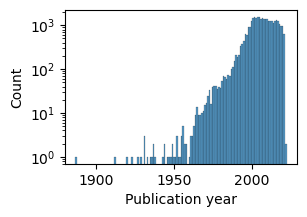

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 2))
sns.histplot(df, x='year', stat='count', discrete=True)
plt.xlabel('Publication year')
plt.yscale('log')
plt.ylabel('Count')
plt.show()

## 10-fold cv

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

# 指标: Accuracy, Precision, Recall, F1
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score)
}

text_features = ['abstract', 'annotation', 'deepseek_v3', 'gemma3', 'llama4', 'qwq']
y = (df['year'] >= 2008).astype(int)

cv = KFold(n_splits=10, shuffle=True, random_state=42)

results = []
for feat in text_features:
    print(f"Processing feature: {feat}")
    X_text = df[feat].astype(str).fillna('')
    vectorizer = ProgressHashingVectorizer(n_features=2**20, stop_words='english', alternate_sign=False)
    X = vectorizer.transform(X_text)
    model = MultinomialNB()
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=-1, verbose=1, return_train_score=False)
    res = {
        'feature': feat,
        'Accuracy_mean': scores['test_Accuracy'].mean(),
        'Accuracy_std': scores['test_Accuracy'].std(),
        'Precision_mean': scores['test_Precision'].mean(),
        'Precision_std': scores['test_Precision'].std(),
        'Recall_mean': scores['test_Recall'].mean(),
        'Recall_std': scores['test_Recall'].std(),
        'F1_mean': scores['test_F1'].mean(),
        'F1_std': scores['test_F1'].std(),
    }
    print(
        f"Feature: {feat} | "
        f"Accuracy: {res['Accuracy_mean']:.4f}±{res['Accuracy_std']:.4f} | "
        f"F1: {res['F1_mean']:.4f}±{res['F1_std']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
display(results_df)

Processing feature: abstract


Vectorizing documents: 100%|████████████████████████████████████████████| 34146/34146 [00:01<00:00, 20368.95it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    4.3s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.4s finished


Feature: abstract | Accuracy: 0.7542±0.0080 | F1: 0.7063±0.0094
Processing feature: annotation


Vectorizing documents: 100%|███████████████████████████████████████████| 34146/34146 [00:00<00:00, 133230.67it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    1.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.0s finished


Feature: annotation | Accuracy: 0.7161±0.0090 | F1: 0.6678±0.0120
Processing feature: deepseek_v3


Vectorizing documents: 100%|████████████████████████████████████████████| 34146/34146 [00:00<00:00, 72311.64it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


Feature: deepseek_v3 | Accuracy: 0.7172±0.0093 | F1: 0.6544±0.0113
Processing feature: gemma3


Vectorizing documents: 100%|███████████████████████████████████████████| 34146/34146 [00:00<00:00, 112990.21it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


Feature: gemma3 | Accuracy: 0.7114±0.0076 | F1: 0.6574±0.0114
Processing feature: llama4


Vectorizing documents: 100%|████████████████████████████████████████████| 34146/34146 [00:00<00:00, 56922.13it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


Feature: llama4 | Accuracy: 0.7082±0.0107 | F1: 0.6682±0.0141
Processing feature: qwq


Vectorizing documents: 100%|████████████████████████████████████████████| 34146/34146 [00:00<00:00, 41747.87it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.1s remaining:    0.2s


Feature: qwq | Accuracy: 0.7116±0.0098 | F1: 0.6457±0.0125


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


,feature,Accuracy_mean,Accuracy_std,Precision_mean,Precision_std,Recall_mean,Recall_std,F1_mean,F1_std
0,abstract,0.754203,0.008020,0.836492,0.011048,0.611367,0.014414,0.706276,0.009402
1,annotation,0.716131,0.009039,0.768938,0.013663,0.590483,0.016425,0.667834,0.011960
2,deepseek_v3,0.717215,0.009269,0.799932,0.011445,0.553913,0.015737,0.654393,0.011265
3,gemma3,0.711416,0.007554,0.771602,0.010839,0.573048,0.019053,0.657395,0.011420
4,llama4,0.708195,0.010678,0.741881,0.013607,0.607991,0.017708,0.668183,0.014121
5,qwq,0.711563,0.009785,0.794972,0.012332,0.543872,0.016115,0.645722,0.012464


## no cv

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

text_features = ['abstract', 'annotation', 'deepseek_v3', 'gemma3', 'llama4', 'qwq']
y = df['year'].astype(int)  # 年份作为连续变量回归

results = []
for feat in text_features:
    print(f"Processing feature: {feat}")
    X_text = df[feat].astype(str).fillna('')
    X_train, X_test, y_train, y_test = train_test_split(
        X_text, y, test_size=0.1, random_state=42
    )

    vectorizer = ProgressHashingVectorizer(n_features=2**18, stop_words='english', alternate_sign=False)
    X_train_vec = vectorizer.transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    model = Ridge(alpha=1.0)
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    res = {
        'feature': feat,
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred),
    }
    print(
        f"Feature: {feat} | "
        f"MAE: {res['MAE']:.4f} | "
        f"R2: {res['R2']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
results_df

Processing feature: abstract


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 22020.20it/s]


Feature: abstract | MAE: 4.2865 | R2: 0.5755
Processing feature: annotation


Vectorizing documents: 100%|████████████████████████████████████████████| 3415/3415 [00:00<00:00, 130228.28it/s]


Feature: annotation | MAE: 5.5461 | R2: 0.3061
Processing feature: deepseek_v3


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 77554.96it/s]


Feature: deepseek_v3 | MAE: 5.0521 | R2: 0.4281
Processing feature: gemma3


Vectorizing documents: 100%|████████████████████████████████████████████| 3415/3415 [00:00<00:00, 120217.45it/s]


Feature: gemma3 | MAE: 5.5035 | R2: 0.3244
Processing feature: llama4


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 54197.36it/s]


Feature: llama4 | MAE: 5.5231 | R2: 0.3139
Processing feature: qwq


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 44297.08it/s]


Feature: qwq | MAE: 5.0755 | R2: 0.4131


,feature,MAE,MSE,R2
0,abstract,4.286524,34.042876,0.575475
1,annotation,5.546063,55.646234,0.306074
2,deepseek_v3,5.052078,45.857851,0.428139
3,gemma3,5.503463,54.177417,0.324391
4,llama4,5.523119,55.020432,0.313878
5,qwq,5.075490,47.060866,0.413137


# Predict title

## Fetch titles

In [2]:
import pandas as pd
from sqlalchemy import create_engine
from tqdm import tqdm

MYSQL_HOST = '144.214.39.113'
MYSQL_USER = 'key'
MYSQL_PASS = 'Keydge11'
MYSQL_DB = 'keydge'

engine = create_engine(f'mysql+pymysql://{MYSQL_USER}:{MYSQL_PASS}@{MYSQL_HOST}/{MYSQL_DB}?charset=utf8mb4')

paper_ids = df['paper_id'].unique().tolist()
BATCH_SIZE = 500  # 每批查多少条，可调大或调小

results = []
# 用tqdm显示批次进度和预计完成时间
for i in tqdm(range(0, len(paper_ids), BATCH_SIZE), desc="Querying titles", unit="batch"):
    batch = paper_ids[i:i+BATCH_SIZE]
    id_str = ','.join(str(int(pid)) for pid in batch)
    sql = f"SELECT paper_id, title FROM paper_bib WHERE paper_id IN ({id_str})"
    batch_df = pd.read_sql(sql, engine)
    results.append(batch_df)

# 合并所有批次的查询结果
paper_title_df = pd.concat(results, ignore_index=True)
display(paper_title_df)

Querying titles: 100%|██████████████████████████████████████████████████████| 59/59 [00:00<00:00, -457.01batch/s]


,paper_id,title
0,1353153,Efficient Generation of a Hepatitis B Virus Cy...
1,1634910,"Structure of Hjc, a Holliday junction resolvas..."
2,1655469,From Complete Genomes to Measures of Substitut...
3,1778349,Regulation of the Proinflammatory Effects of F...
4,2550721,Differential requirement for p19ARF in the p53...
...,...,...
29334,135559127,Assessing the contribution of the ENSO and MJO...
29335,136137471,Fly Cell Atlas: A single-nucleus transcriptomi...
29336,136366684,Spatial-CUT&amp;Tag: Spatially resolved chroma...
29337,136374303,Sonogenetic control of mammalian cells using e...


In [3]:
df = df.merge(paper_title_df, on='paper_id', how='left')
display(df)

,abs_doi,paper_id,abstract,annotation,deepseek_v3,gemma3,llama4,qwq,qwen3,title
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study provides genetic evidence for two i...,Reference 16 provides a molecular phylogeny of...,This study proposes that zebu and taurine catt...,This study uses mitochondrial DNA analysis to ...,This study analyzes mitochondrial DNA diversit...,Evidence for two independent domestications of...
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides genetic evidence for indep...,This study demonstrates independent domesticat...,This study reports the origin of European and ...,This study uses mitochondrial and nuclear DNA ...,This study demonstrates independent domesticat...,The Origin of the Domestic Pig: Independent Do...
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study reports the fine-mapping of a QTL f...,Reference 53 reports fine-mapping of a QTL for...,The QTL was fine-mapped to a 5 cM region on BT...,This study uses high-density marker genotyping...,This study fine-maps a milk production QTL on ...,Fine-mapping of quantitative trait loci by ide...
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study provides the first genome-wide LD m...,This study documents an unusually strong and l...,The authors provide evidence that linkage dise...,This study generates a genome-wide linkage dis...,This study reports high levels of both synteni...,Extensive Genome-wide Linkage Disequilibrium i...
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on chromosom...,This study identifies a major QTL on pig chrom...,This study reports a major QTL on SSC4 for fat...,This study identifies a major quantitative tra...,This study identifies quantitative trait loci ...,Genetic mapping of quantitative trait loci for...
...,...,...,...,...,...,...,...,...,...,...
35616,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study demonstrates that CD4+CD127lo/−CD25...,This study provides a method for isolation and...,This study demonstrates that Tregs can be expa...,This study evaluates methods for isolating and...,This study demonstrates that CD4+CD127lo/−CD25...,Expansion of Human Regulatory T-Cells From Pat...
35617,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study reports the engineering of orthogon...,This study describes an engineered IL-2/IL-2R ...,This study presents an engineered IL-2 partial...,This study engineers synthetic IL-2–receptor p...,This study describes engineered orthogonal IL-...,Selective targeting of engineered T cells usin...
35618,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies hybrid insulin peptides ...,This study reports the identification of hybri...,This study highlights the potential importance...,This study identifies hybrid peptides—covalent...,This study identifies hybrid peptides formed b...,Pathogenic CD4 T cells in type 1 diabetes reco...
35619,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This study demonstrates a multiplex genome-edi...,This work reports on a cell engineering strate...,This study identifies a strategy for broad imm...,This study describes a dual strategy to engine...,This work describes a multiplex genome editing...,G

## Generate negative samples

In [4]:
import pandas as pd
import re
import random
from typing import Optional, List, Tuple
from tqdm import tqdm
import nltk

def find_first_we_sentence(abstract: str) -> Optional[str]:
    """找到abstract中第一个包含"we"的句子"""
    if pd.isna(abstract) or not isinstance(abstract, str):
        return None
    
    sentences = re.split(r'[.!?]+', abstract)
    
    for sentence in sentences:
        sentence = sentence.strip()
        if not sentence:
            continue
            
        if re.search(r'\bwe\b', sentence, re.IGNORECASE):
            cleaned_sentence = re.sub(r'\s+', ' ', sentence).strip()
            return cleaned_sentence
    
    return None

def get_random_title(abstract: str) -> Optional[str]:
    """
    当没有包含'we'的句子时，使用随机句子生成负样本标题
    Args:
        abstract: 摘要文本
    Returns:
        生成的标题文本
    """
    if pd.isna(abstract) or not isinstance(abstract, str):
        return None
    # 使用NLTK的句子分词器
    sentences = nltk.sent_tokenize(abstract)
    sentences = [s.strip() for s in sentences if s.strip() and len(s.strip()) > 10]
    if not sentences:
        return None
    else:
        selected = random.choice(sentences)
        return re.sub(r'\s+', ' ', selected).strip()
    return get_random_title_regex_improved(abstract)

def generate_balanced_negative_samples(df: pd.DataFrame, random_seed: int = 42) -> Tuple[pd.DataFrame, dict]:
    """
    生成与正样本数量相同的负样本
    Args:
        df: 原始dataframe
        random_seed: 随机种子
    Returns:
        (enhanced_dataframe, statistics_dict)
    """
    random.seed(random_seed)
    # 下载必要的数据（第一次使用时需要）
    nltk.download('punkt')

    # 正样本
    positive_samples = df.copy()
    positive_samples['title_paired'] = True
    negative_samples_list = []

    we_sentence_count = 0
    random_sentence_count = 0

    for idx, row in tqdm(df.iterrows(), total=len(df), desc="生成负样本"):
        negative_sample = row.copy()
        negative_sample['title_paired'] = False
        generated_title = None
        
        # 策略1: 尝试找包含'we'的句子
        we_sentence = find_first_we_sentence(row['abstract'])
        if we_sentence is not None:
            generated_title = we_sentence
            we_sentence_count += 1
        # 策略2: 使用随机句子
        else:
            random_title = get_random_title(row['abstract'])
            if random_title is not None:
                generated_title = random_title
                random_sentence_count += 1
            else:
                raise ValueError(f"无法为行 {idx} 生成负样本标题，摘要内容可能过短或格式不正确。")

        # 记录
        negative_sample['title'] = generated_title
        negative_samples_list.append(negative_sample)
    print(f"包含'we'的句子数量: {we_sentence_count}, 随机句子数量: {random_sentence_count}")
    # 创建负样本DataFrame
    negative_samples = pd.DataFrame(negative_samples_list)
    # 合并正负样本
    combined_df = pd.concat([positive_samples, negative_samples], ignore_index=True)
    
    return combined_df

In [5]:
title_match_df = generate_balanced_negative_samples(df, random_seed=42)

[nltk_data] Downloading package punkt to /home/lyuzhuoqi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
生成负样本: 100%|████████████████████████████████████████████████████████| 35621/35621 [00:13<00:00, 2676.87it/s]


包含'we'的句子数量: 23745, 随机句子数量: 11876


In [45]:
title_match_df

,abs_doi,paper_id,abstract,annotation,deepseek_v3,gemma3,llama4,qwq,qwen3,title,title_paired
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study provides genetic evidence for two i...,Reference 16 provides a molecular phylogeny of...,This study proposes that zebu and taurine catt...,This study uses mitochondrial DNA analysis to ...,This study analyzes mitochondrial DNA diversit...,Evidence for two independent domestications of...,True
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides genetic evidence for indep...,This study demonstrates independent domesticat...,This study reports the origin of European and ...,This study uses mitochondrial and nuclear DNA ...,This study demonstrates independent domesticat...,The Origin of the Domestic Pig: Independent Do...,True
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study reports the fine-mapping of a QTL f...,Reference 53 reports fine-mapping of a QTL for...,The QTL was fine-mapped to a 5 cM region on BT...,This study uses high-density marker genotyping...,This study fine-maps a milk production QTL on ...,Fine-mapping of quantitative trait loci by ide...,True
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study provides the first genome-wide LD m...,This study documents an unusually strong and l...,The authors provide evidence that linkage dise...,This study generates a genome-wide linkage dis...,This study reports high levels of both synteni...,Extensive Genome-wide Linkage Disequilibrium i...,True
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on chromosom...,This study identifies a major QTL on pig chrom...,This study reports a major QTL on SSC4 for fat...,This study identifies a major quantitative tra...,This study identifies quantitative trait loci ...,Genetic mapping of quantitative trait loci for...,True
...,...,...,...,...,...,...,...,...,...,...,...
71237,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study demonstrates that CD4+CD127lo/−CD25...,This study provides a method for isolation and...,This study demonstrates that Tregs can be expa...,This study evaluates methods for isolating and...,This study demonstrates that CD4+CD127lo/−CD25...,RESEARCH DESIGN AND METHODS—Tregs from recent-...,False
71238,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study reports the engineering of orthogon...,This study describes an engineered IL-2/IL-2R ...,This study presents an engineered IL-2 partial...,This study engineers synthetic IL-2–receptor p...,This study describes engineered orthogonal IL-...,"Science , this issue p. 1037 ; see also p. 990",False
71239,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies hybrid insulin peptides ...,This study reports the identification of hybri...,This study highlights the potential importance...,This study identifies hybrid peptides—covalent...,This study identifies hybrid peptides formed b...,T cells target peptide combos One of the endur...,False
71240,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This study demonstrates a multiplex genome-edi...,This work reports on a cell engineering strate...,This study identifies a strategy for broad imm...,This study describes a dual strategy to en

## Evaluation

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

# 评价指标
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score)
}

text_features = ['abstract', 'annotation', 'deepseek_v3', 'qwen3','gemma3', 'llama4', 'qwq']
y = title_match_df['title_paired'].astype(int)  # 1: 匹配，0: 不匹配

cv = KFold(n_splits=10, shuffle=True, random_state=42)

results = []
for feat in text_features:
    print(f"Processing feature: {feat}")
    # 拼接title和对应的feature
    X_text = (title_match_df['title'].astype(str).fillna('') + ' [SEP] ' + title_match_df[feat].astype(str).fillna(''))
    vectorizer = ProgressHashingVectorizer(n_features=2**20, stop_words='english', alternate_sign=False)
    X = vectorizer.transform(X_text)
    model = LogisticRegression(max_iter=2000, random_state=42)
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=-1, verbose=1, return_train_score=False)
    res = {
        'feature': feat,
        'Accuracy_mean': scores['test_Accuracy'].mean(),
        'Accuracy_std': scores['test_Accuracy'].std(),
        'Precision_mean': scores['test_Precision'].mean(),
        'Precision_std': scores['test_Precision'].std(),
        'Recall_mean': scores['test_Recall'].mean(),
        'Recall_std': scores['test_Recall'].std(),
        'F1_mean': scores['test_F1'].mean(),
        'F1_std': scores['test_F1'].std(),
    }
    print(
        f"Feature: {feat} | "
        f"Accuracy: {res['Accuracy_mean']:.4f}±{res['Accuracy_std']:.4f} | "
        f"F1: {res['F1_mean']:.4f}±{res['F1_std']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
display(results_df)

Processing feature: abstract


Vectorizing documents: 100%|████████████████████████████████████████████| 71242/71242 [00:04<00:00, 15925.88it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:   14.8s remaining:   22.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   20.1s finished


Feature: abstract | Accuracy: 0.5084±0.0060 | F1: 0.5045±0.0079
Processing feature: annotation


Vectorizing documents: 100%|████████████████████████████████████████████| 71242/71242 [00:01<00:00, 67577.24it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:   20.6s remaining:   30.9s
/home/lyuzhuoqi/miniconda3/envs/p2v/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   26.9s finished


Feature: annotation | Accuracy: 0.7564±0.0058 | F1: 0.7619±0.0074
Processing feature: deepseek_v3


Vectorizing documents: 100%|████████████████████████████████████████████| 71242/71242 [00:01<00:00, 39615.66it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:   16.4s remaining:   24.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   24.1s finished


Feature: deepseek_v3 | Accuracy: 0.7478±0.0064 | F1: 0.7593±0.0077
Processing feature: qwen3


Vectorizing documents: 100%|████████████████████████████████████████████| 71242/71242 [00:02<00:00, 29832.09it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:   11.0s remaining:   16.6s
/home/lyuzhuoqi/miniconda3/envs/p2v/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   24.1s finished


Feature: qwen3 | Accuracy: 0.7201±0.0039 | F1: 0.7332±0.0037
Processing feature: gemma3


Vectorizing documents: 100%|████████████████████████████████████████████| 71242/71242 [00:01<00:00, 61377.55it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:   17.9s remaining:   26.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   21.9s finished


Feature: gemma3 | Accuracy: 0.7749±0.0067 | F1: 0.7818±0.0071
Processing feature: llama4


Vectorizing documents: 100%|████████████████████████████████████████████| 71242/71242 [00:01<00:00, 40794.86it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:   19.1s remaining:   28.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   24.7s finished


Feature: llama4 | Accuracy: 0.7369±0.0067 | F1: 0.7439±0.0073
Processing feature: qwq


Vectorizing documents: 100%|████████████████████████████████████████████| 71242/71242 [00:02<00:00, 30180.74it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:   10.1s remaining:   15.2s


Feature: qwq | Accuracy: 0.6874±0.0061 | F1: 0.7013±0.0067


/home/lyuzhuoqi/miniconda3/envs/p2v/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   24.3s finished


,feature,Accuracy_mean,Accuracy_std,Precision_mean,Precision_std,Recall_mean,Recall_std,F1_mean,F1_std
0,abstract,0.508352,0.005998,0.508627,0.013508,0.500613,0.008453,0.504460,0.007865
1,annotation,0.756450,0.005793,0.744982,0.010693,0.779757,0.007058,0.761934,0.007406
2,deepseek_v3,0.747775,0.006424,0.726025,0.010817,0.795769,0.005984,0.759268,0.007698
3,qwen3,0.720123,0.003935,0.700455,0.009264,0.769389,0.006850,0.733229,0.003701
4,gemma3,0.774880,0.006730,0.758298,0.010102,0.806947,0.006554,0.781835,0.007141
5,llama4,0.736869,0.006707,0.724531,0.012636,0.764492,0.007402,0.743896,0.007345
6,qwq,0.687375,0.006145,0.671364,0.012135,0.734248,0.003727,0.701335,0.006732


In [18]:
import pandas as pd
import numpy as np
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from transformers import EarlyStoppingCallback
import torch
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

# 设定设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 评价指标
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    return {
        'accuracy': accuracy_score(labels, preds),
        'precision': precision_score(labels, preds),
        'recall': recall_score(labels, preds),
        'f1': f1_score(labels, preds)
    }

class TitlePairDataset(torch.utils.data.Dataset):
    def __init__(self, titles, contents, labels, tokenizer, max_length=128):
        self.encodings = tokenizer(
            titles, contents,
            padding='max_length',
            truncation=True,
            max_length=max_length,
            return_tensors='pt'
        )
        self.labels = torch.tensor(labels, dtype=torch.long)
    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item
    def __len__(self):
        return len(self.labels)

# 配置
text_features = ['abstract', 'annotation', 'deepseek_v3', 'qwen3','gemma3', 'llama4', 'qwq']
y = title_match_df['title_paired'].astype(int).values
cv = KFold(n_splits=10, shuffle=True, random_state=42)
results = []

# tokenizer和model（可选用其它bert变体）
model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizerFast.from_pretrained(model_name)

for feat in text_features:
    print(f"\nProcessing feature: {feat}")
    X_title = title_match_df['title'].astype(str).fillna('').tolist()
    X_content = title_match_df[feat].astype(str).fillna('').tolist()
    labels = y

    fold_metrics = []
    for fold, (train_idx, test_idx) in enumerate(cv.split(X_title)):
        print(f"  Fold {fold+1}/10")
        # 划分
        train_titles = [X_title[i] for i in train_idx]
        train_contents = [X_content[i] for i in train_idx]
        train_labels = labels[train_idx]

        test_titles = [X_title[i] for i in test_idx]
        test_contents = [X_content[i] for i in test_idx]
        test_labels = labels[test_idx]

        # 构造Dataset
        train_dataset = TitlePairDataset(train_titles, train_contents, train_labels, tokenizer)
        test_dataset = TitlePairDataset(test_titles, test_contents, test_labels, tokenizer)

        # 每折新建模型（避免权重泄漏）
        model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=2).to(device)

        training_args = TrainingArguments(
            output_dir=home / f'projects/TLDR/evaluation/predict_task/title_tmp_distilbert_fold_{fold}',
            num_train_epochs=2,          # 建议先用2轮，数据多可调大
            per_device_train_batch_size=16,
            per_device_eval_batch_size=32,
            eval_strategy='epoch',
            save_strategy='no',
            learning_rate=2e-5,
            logging_steps=50,
            report_to=[],
            load_best_model_at_end=False,
            seed=42+fold
        )

        trainer = Trainer(
            model=model,
            args=training_args,
            train_dataset=train_dataset,
            eval_dataset=test_dataset,
            compute_metrics=compute_metrics,
        )

        trainer.train()
        eval_result = trainer.evaluate()
        fold_metrics.append(eval_result)

        # 释放显存
        del model
        torch.cuda.empty_cache()

    # 汇总
    res = {
        'feature': feat,
        'Accuracy_mean': np.mean([m['eval_accuracy'] for m in fold_metrics]),
        'Accuracy_std': np.std([m['eval_accuracy'] for m in fold_metrics]),
        'Precision_mean': np.mean([m['eval_precision'] for m in fold_metrics]),
        'Precision_std': np.std([m['eval_precision'] for m in fold_metrics]),
        'Recall_mean': np.mean([m['eval_recall'] for m in fold_metrics]),
        'Recall_std': np.std([m['eval_recall'] for m in fold_metrics]),
        'F1_mean': np.mean([m['eval_f1'] for m in fold_metrics]),
        'F1_std': np.std([m['eval_f1'] for m in fold_metrics]),
    }
    print(
        f"Feature: {feat} | "
        f"Accuracy: {res['Accuracy_mean']:.4f}±{res['Accuracy_std']:.4f} | "
        f"F1: {res['F1_mean']:.4f}±{res['F1_std']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
display(results_df)


Processing feature: abstract
  Fold 1/10


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 